<a href="https://colab.research.google.com/github/GouravSolanki-Dev/Stock-Price-prediction-using-Facebook-Prophet/blob/main/Stock_price_prediction_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
!pip install prophet
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [29]:
df = pd.read_csv('TSLA1.csv')

In [30]:
#read_csv function from pandas

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3173 non-null   object 
 1   Open       3173 non-null   float64
 2   High       3173 non-null   float64
 3   Low        3173 non-null   float64
 4   Close      3173 non-null   float64
 5   Adj Close  3173 non-null   float64
 6   Volume     3173 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.6+ KB


In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3.173000e+03
mean,59.439744,60.788224,57.965386,59.403464,59.403464,9.435458e+07
std,95.575692,97.789307,93.094113,95.460596,95.460596,8.193729e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.123333,9.446667,8.940667,9.186667,9.186667,4.260090e+07
50%,16.336666,16.544666,16.083332,16.316000,16.316000,7.619220e+07
75%,25.199333,25.666668,24.846666,25.304667,25.304667,1.187910e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [34]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [35]:
px.area(df, x="Date", y="Close")

In [36]:
px.line(df, x="Date", y="Close")

In [37]:
px.area(df, x="Date", y="Volume")

In [38]:
px.bar(df, y="Volume")

In [39]:
px.box(df, y="Close")

# Understanding Facebook Prophet

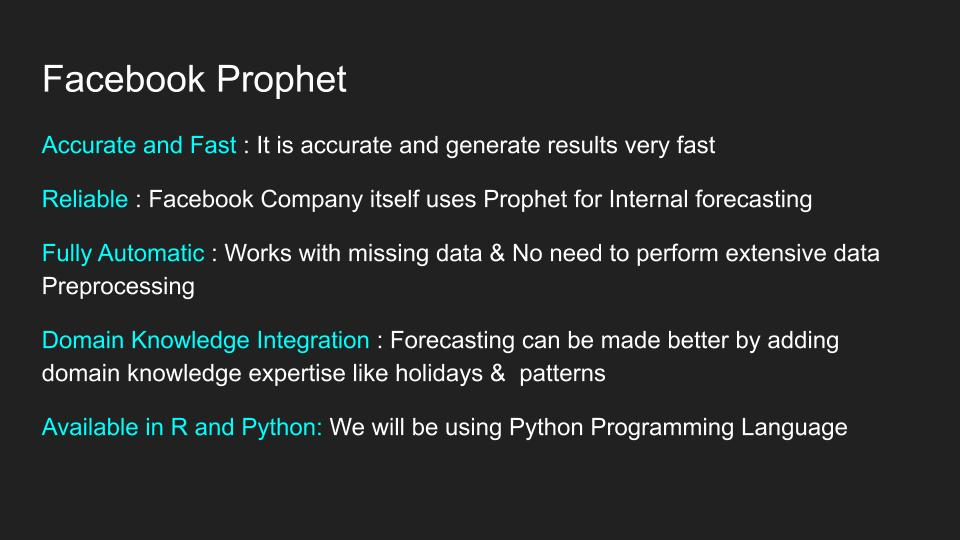

## Data Preperation

In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3168,2023-01-30,178.050003,179.770004,166.500000,166.660004,166.660004,230878800
3169,2023-01-31,164.570007,174.300003,162.779999,173.220001,173.220001,196813500
3170,2023-02-01,173.889999,183.809998,169.929993,181.410004,181.410004,213806300
3171,2023-02-02,187.330002,196.750000,182.610001,188.270004,188.270004,217448300


In [41]:
col=['Date','Close']
ndf=pd.DataFrame(df,columns=col)

In [42]:
ndf

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3168,2023-01-30,166.660004
3169,2023-01-31,173.220001
3170,2023-02-01,181.410004
3171,2023-02-02,188.270004


In [43]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [44]:
prophet_df

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3168,2023-01-30,166.660004
3169,2023-01-31,173.220001
3170,2023-02-01,181.410004
3171,2023-02-02,188.270004


## Creating Facebook Prophet Model

In [45]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswtiuulw/yppsmq0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswtiuulw/xz69v2vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61677', 'data', 'file=/tmp/tmpswtiuulw/yppsmq0u.json', 'init=/tmp/tmpswtiuulw/xz69v2vy.json', 'output', 'file=/tmp/tmpswtiuulw/prophet_modelmas_mlup/prophet_model-20230205140809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [46]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,-1.141853,-48.582040,36.650735,-1.141853,-1.141853,-7.140419,-7.140419,-7.140419,-0.584796,-0.584796,-0.584796,-6.555623,-6.555623,-6.555623,0.0,0.0,0.0,-8.282272
1,2010-06-30,-1.132602,-49.889303,33.737391,-1.132602,-1.132602,-6.770310,-6.770310,-6.770310,-0.457741,-0.457741,-0.457741,-6.312570,-6.312570,-6.312570,0.0,0.0,0.0,-7.902913
2,2010-07-01,-1.123352,-54.456859,35.866223,-1.123352,-1.123352,-6.791260,-6.791260,-6.791260,-0.728528,-0.728528,-0.728528,-6.062732,-6.062732,-6.062732,0.0,0.0,0.0,-7.914612
3,2010-07-02,-1.114101,-50.010549,34.931009,-1.114101,-1.114101,-6.917047,-6.917047,-6.917047,-1.106144,-1.106144,-1.106144,-5.810902,-5.810902,-5.810902,0.0,0.0,0.0,-8.031148
4,2010-07-06,-1.077099,-49.440053,34.862250,-1.077099,-1.077099,-5.460753,-5.460753,-5.460753,-0.584796,-0.584796,-0.584796,-4.875956,-4.875956,-4.875956,0.0,0.0,0.0,-6.537851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,2023-03-01,302.158999,259.783193,344.714256,302.158999,302.158999,2.920551,2.920551,2.920551,-0.457741,-0.457741,-0.457741,3.378292,3.378292,3.378292,0.0,0.0,0.0,305.079550
3199,2023-03-02,302.311641,264.711449,348.684543,302.311641,302.311641,2.001281,2.001281,2.001281,-0.728528,-0.728528,-0.728528,2.729809,2.729809,2.729809,0.0,0.0,0.0,304.312923
3200,2023-03-03,302.464284,260.871002,345.496953,302.464284,302.464284,1.026942,1.026942,1.026942,-1.106144,-1.106144,-1.106144,2.133086,2.133086,2.133086,0.0,0.0,0.0,303.491225
3201,2023-03-04,302.616926,261.907843,346.609474,302.616926,302.616926,2.965718,2.965718,2.965718,1.367236,1.367236,1.367236,1.598482,1.598482,1.598482,0.0,0.0,0.0,305.582644


In [48]:
px.line(forecast, x='ds', y='yhat')

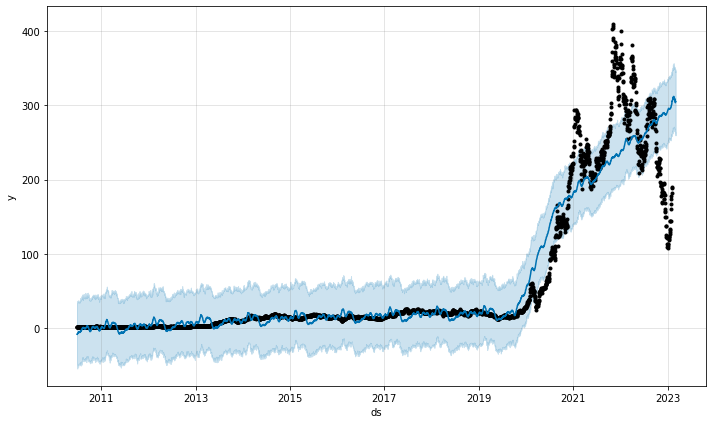

In [49]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

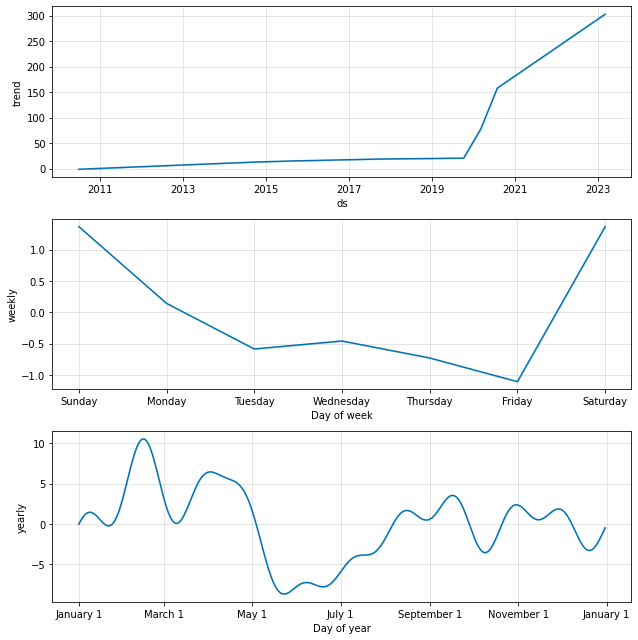

In [50]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [51]:
from google.colab import files
forecast.to_csv('forecast.csv')
#files.download('forecast.csv')